Importing the required labs

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV dataset as Pandas Dataframe

In [14]:
df = pd.read_csv('data/stud.csv')

Show Top 5 records

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3. Data Checks to perform


In [16]:
df.shape

(1000, 8)

In [12]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
df.duplicated().sum()

0

There are 0 duplicate values

4. Cheacking the no. unique values for each columns

In [19]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

5. Check statistics of the dataset

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [40]:
print("Categories in 'gender' variable:  ",end=" ")
print(df.gender.unique())

print("\nCategories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("\nCategories in 'parental level of education' variable:  \n",end=" ")
print(df['parental level of education'].unique())

print("\nCategories in 'lunch' variable:  ",end=" ")
print(df.lunch.unique())

print("\nCategories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:   ['female' 'male']

Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental level of education' variable:  
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:   ['standard' 'free/reduced']

Categories in 'test preparation course' variable:   ['none' 'completed']


Define Numerical and catagorical faetures 

In [45]:
numaric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have ",len(numaric_features)," Numerical_features : ",numaric_features)
print("\nWe have ",len(categorical_features)," Numerical_features :  \n",categorical_features)

We have  3  Numerical_features :  ['math score', 'reading score', 'writing score']

We have  5  Numerical_features :  
 ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding columns for total score and average score 

In [46]:
df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
#df[df['reading score']==100]['average_score'].count()

17

In [59]:
math_full = (df['math score']==100).sum()
reading_full = (df['reading score']==100).sum()
writing_full = (df['writing score']==100).sum()

print("No of students with full marks in math :",math_full)
print("\nNo of students with full marks in reading :",reading_full)
print("\nNo of students with full marks in writing :",writing_full)

No of students with full marks in math : 7

No of students with full marks in reading : 17

No of students with full marks in writing : 14


In [61]:
math_fail = (df['math score']<=34).sum()
reading_fail = (df['reading score']<=34).sum()
writing_fail = (df['writing score']<=34).sum()

print("No of students failed in math :",math_fail)
print("\nNo of students failed in reading :",reading_fail)
print("\nNo of students failed in writing :",writing_fail)

No of students failed in math : 22

No of students failed in reading : 15

No of students failed in writing : 17


Data Visualization (Historam and kde)

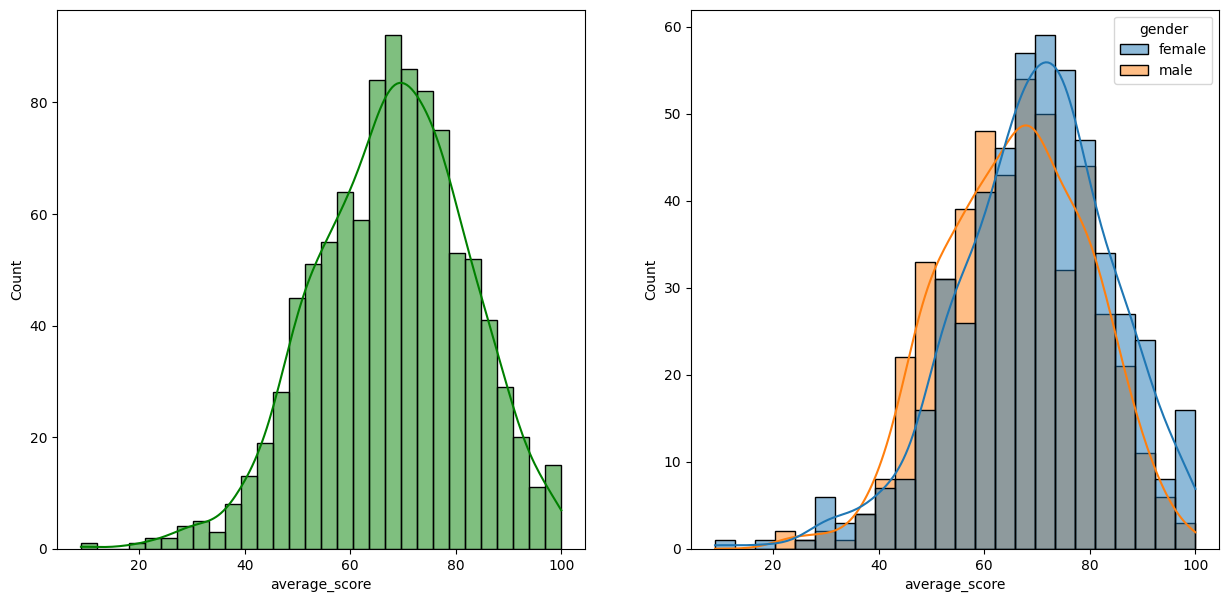

In [63]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

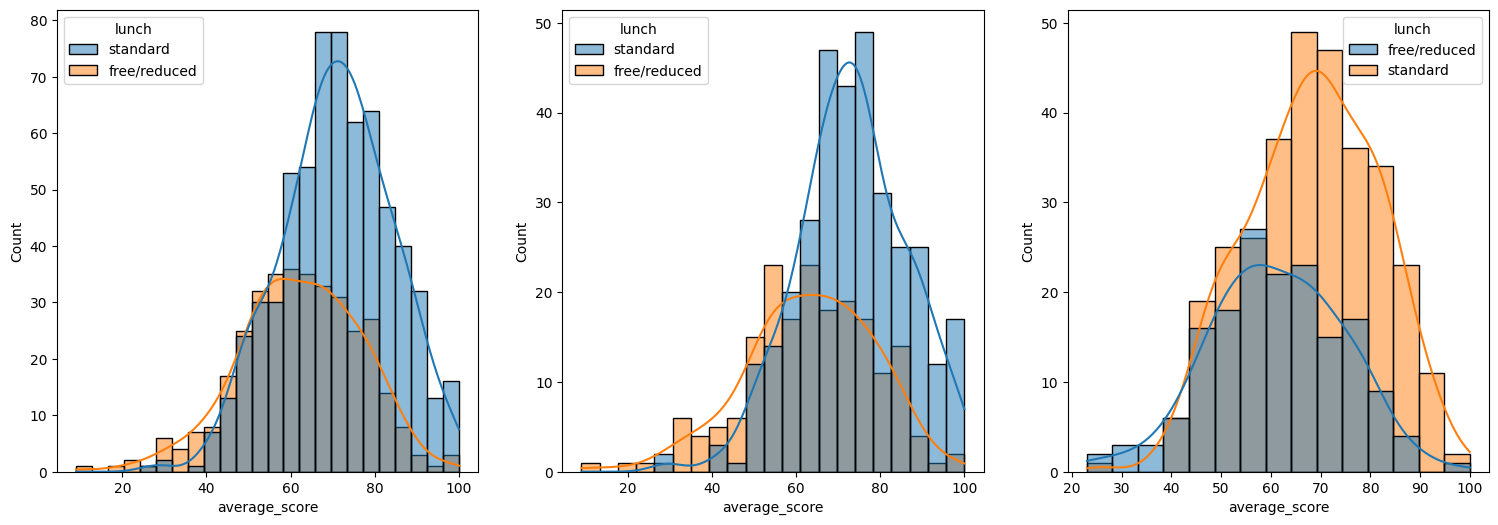

In [64]:
plt.subplots(1, 3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,color='g',hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average_score',kde=True,hue='lunch')

plt.show()

In [65]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


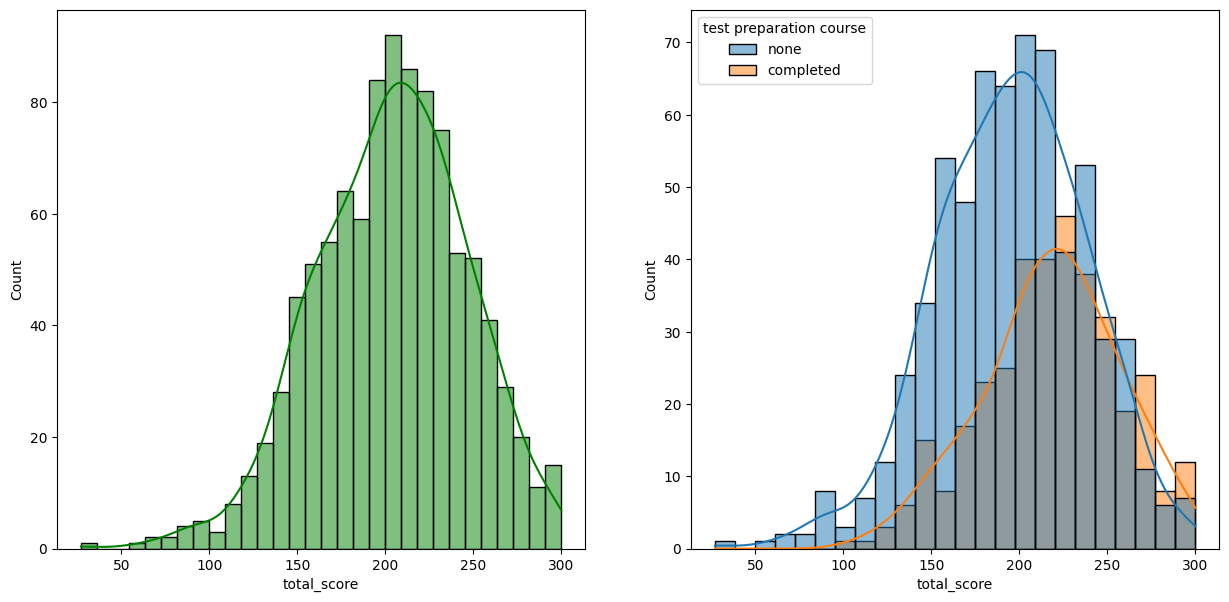

In [71]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='test preparation course')
plt.show()

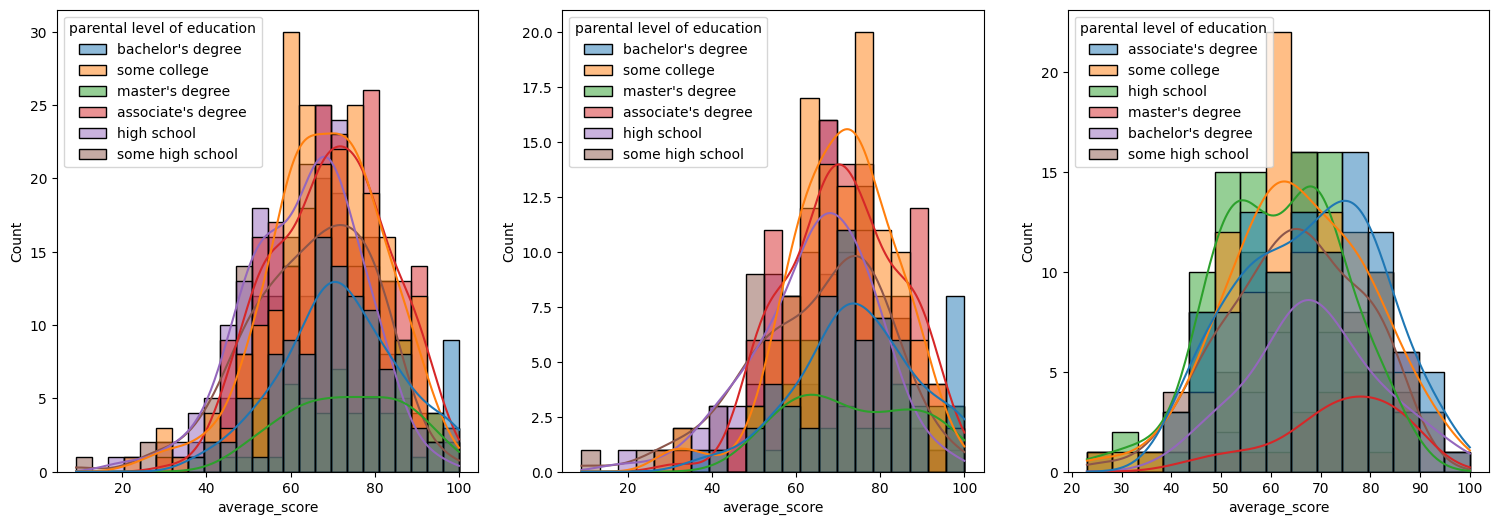

In [72]:
plt.subplots(1, 3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,color='g',hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average_score',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average_score',kde=True,hue='parental level of education')

plt.show()

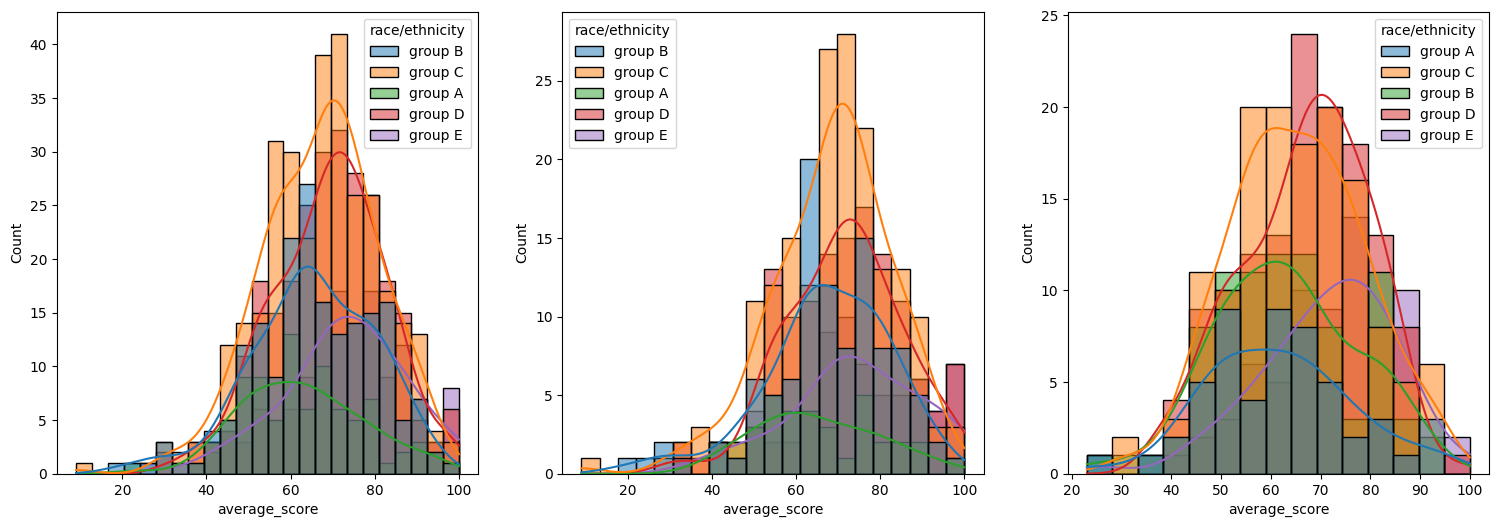

In [73]:
plt.subplots(1, 3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,color='g',hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average_score',kde=True,hue='race/ethnicity')

plt.show()

Maximum students scores in all three subjects

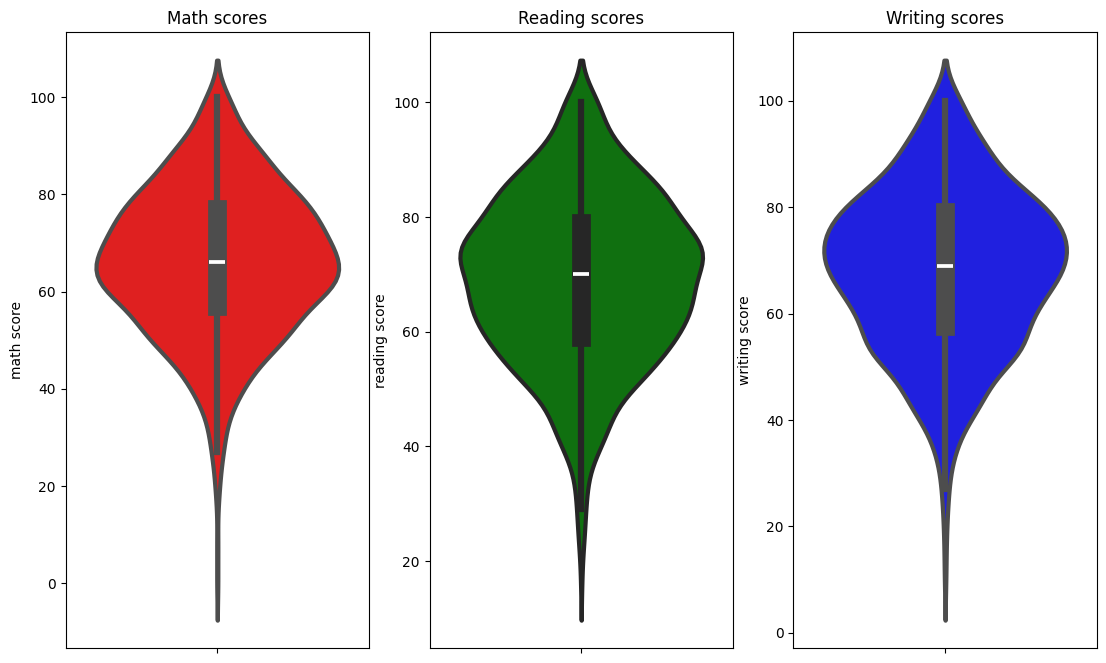

In [74]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math scores')
sns.violinplot(y='math score',data = df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading scores')
sns.violinplot(y='reading score',data = df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing scores')
sns.violinplot(y='writing score',data = df,color='blue',linewidth=3)

plt.show()

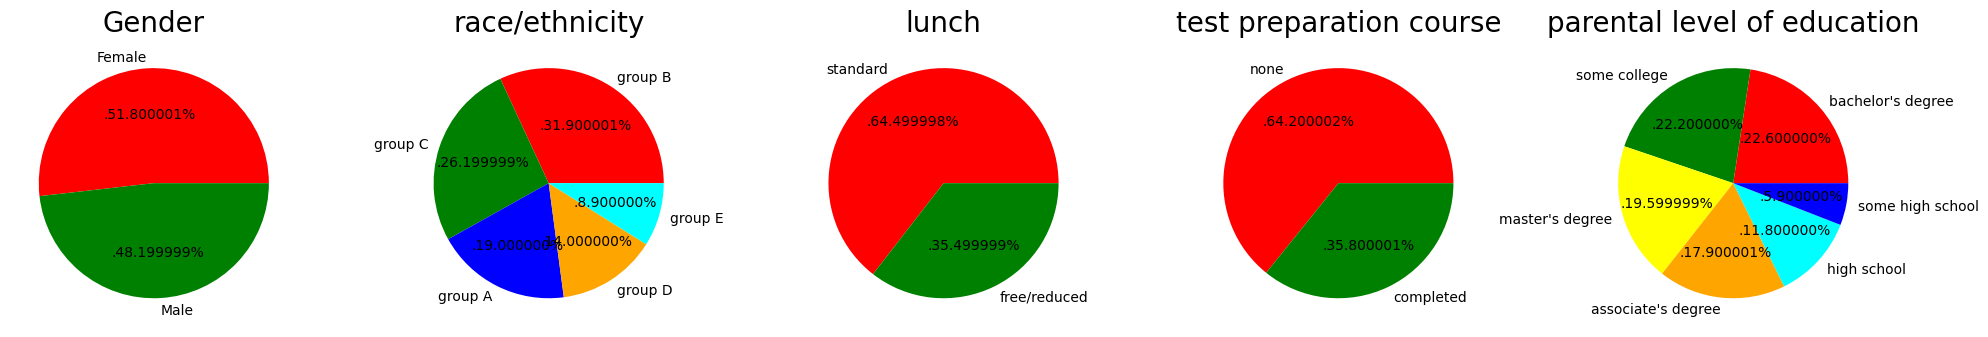

In [82]:
plt.rcParams['figure.figsize'] = (20,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female' , 'Male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize = 20)
plt.axis('off')


plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'group B', 'group C', 'group A', 'group D', 'group E'
color = ['red','green','blue','orange','cyan']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race/ethnicity',fontsize = 20)
plt.axis('off')


plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'standard', 'free/reduced'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('lunch',fontsize = 20)
plt.axis('off')


plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'none', 'completed'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('test preparation course',fontsize = 20)
plt.axis('off')


plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = "bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'
color = ['red','green','yellow','orange','cyan','blue']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('parental level of education',fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

In [95]:
df['gender'].dtype


dtype('O')

In [96]:
gender_group = df.groupby('gender').sum()
gender_group

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
gender,,,,,,,,,
female,group Bgroup Cgroup Bgroup Bgroup Bgroup Bgrou...,bachelor's degreesome collegemaster's degreeas...,standardstandardstandardstandardstandardfree/r...,nonecompletednonenonecompletednonenonenonenone...,32962,37611,37538,108111,36037.000000
male,group Agroup Cgroup Bgroup Dgroup Cgroup Dgrou...,associate's degreesome collegesome collegehigh...,free/reducedstandardfree/reducedfree/reducedst...,nonenonenonecompletednonenonecompletednonecomp...,33127,31558,30516,95201,31733.666667


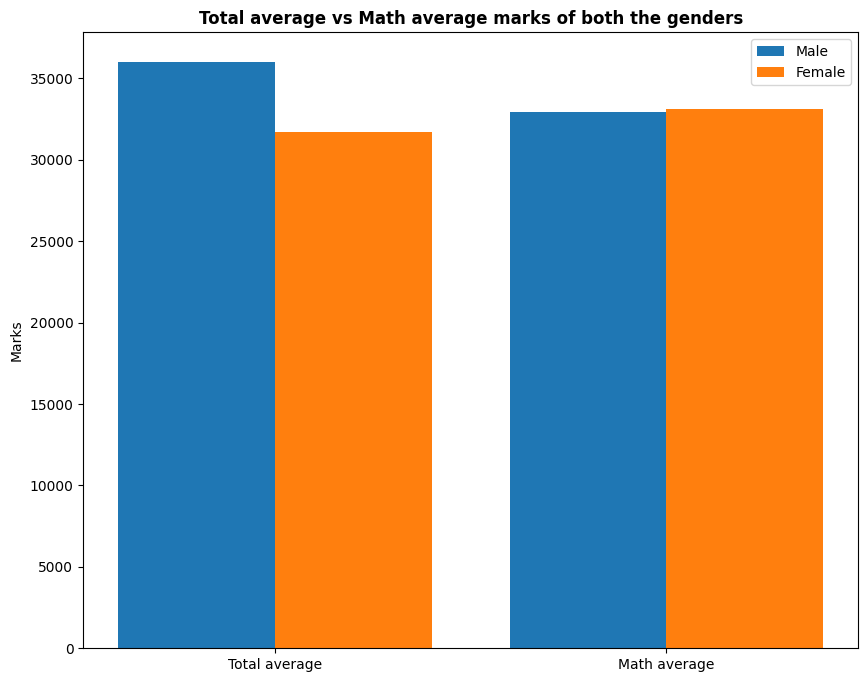

In [88]:
gender_group = df.groupby('gender').sum()

plt.figure(figsize=(10,8))

x = ['Total average','Math average']

male_score = [gender_group['average_score'][0],gender_group['math score'][0]]
female_score = [gender_group['average_score'][1],gender_group['math score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, male_score,0.4,label = 'Male')
plt.bar(x_axis + 0.2, female_score,0.4,label = 'Female')

plt.xticks(x_axis,x)
plt.ylabel('Marks')
plt.title('Total average vs Math average marks of both the genders',fontweight='bold')
plt.legend()
plt.show()